# MASTER - Notebook 1
### Matteo Grazioso 884055

In [78]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create a requirements.txt file
!pip freeze > requirements.txt


In [79]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [80]:
# The data is in the same directory as the notebook and is named 'validazioni.txt'. 
# The file contains the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file
df = pd.read_csv('data/raw/validazioni.txt', header=0, sep='\t')
# df = pd.read_csv('data7raw/esportazioneCompleta.txt', header=0, sep='\t') # dataset with annual and monthly tickets

In [81]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/05/2022 00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,13/05/2022 00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,13/05/2022 00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,13/05/2022 00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,13/05/2022 00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [82]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
5056636,15/07/2022 06:46,36141603027798788,3435,Oriago Stazi,14123,Extra tratta 3
5056637,15/07/2022 06:46,36141603027798788,3435,Oriago Stazi,14123,Extra tratta 3
5056638,15/07/2022 06:46,36141603027798788,3436,Oriago Centr,14123,Extra tratta 3
5056639,15/07/2022 07:01,65676630087266309,1306,Spinea Orgna,14123,Extra tratta 3
5056640,15/07/2022 07:07,36428626034318852,1312,Spinea Giorg,14123,Extra tratta 3


## Explorative Data Analysis


In [83]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2022-05-13,00:00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,2022-05-13,00:00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,2022-05-13,00:00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,2022-05-13,00:00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,2022-05-13,00:00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [84]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2022-05-13 00:00:00 00:00:00
Last validation:  2022-07-15 00:00:00 23:59:00
Number of Serial numbers:  2038775
Number of validation:  5056641
Number of tickets:  168
Number of titolo:  170
Number of FERMATA:  1672
Number of DESCRIZIONE:  935


In [85]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

DAILY PASS VENEZIA - AVM         972478
75'-Tpl 6,64-ComVe0,86           743608
48h-Tpl 24,90-ComVe5,10          600320
72h-Tpl 33,40-ComVe6,60          492911
Bigl.Aut.75'Mestre/Lido-tsc      422668
7gg-Tpl 43,60-ComVe16,40         342870
75'-Tpl 13,28-ComVe1,72          232644
Biglietto 72 ore Roll. Venice    170675
72ore online no aerobus          108357
7 days online no aerobus         101869
Name: DESCRIZIONE_TITOLO, dtype: int64

In [86]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2022-05-17  03:38:00    383
2022-05-18  03:38:00    362
2022-06-04  15:27:00    258
2022-05-27  17:25:00    258
2022-06-03  16:28:00    254
2022-05-27  10:26:00    250
            10:54:00    249
2022-06-04  16:26:00    247
2022-05-27  11:14:00    246
            10:10:00    242
Name: SERIALE, dtype: int64

In [87]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

San Marco-Sa    583170
Rialto          346023
LIDO S.M.E.     274706
BURANO "C"      248780
VENEZIA         238940
P.le Roma "G    220171
FERROVIA "B"    194802
San Marco Va    145476
Punta Sabbio    114300
FERROVIA "D"    101044
Name: DESCRIZIONE, dtype: int64

## Categories

In [88]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

# This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:
# 1. One-day ticket
# 2. Two-day ticket
# 3. Three-day ticket
# 4. Weekly ticket (Seven-day ticket)
# 5. Monthly ticket
# 6. Annual ticket
# 7. Other ticket (if it is necessary to add other types of tickets)


In [89]:
df.head()

,DATA,ORA,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO,TICKET_CODE
0,2022-05-13,00:00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40",TBD
1,2022-05-13,00:00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10",TBD
2,2022-05-13,00:00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60",TBD
3,2022-05-13,00:00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC,TBD
4,2022-05-13,00:00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC,TBD


In [90]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', '5': 'Monthly ticket', '6': 'Annual ticket',
                '7': 'Other ticket', '7a': '75 minutes', '7b': 'B_Other ticket'}
# Export the dictionary to a json file
import json
with open('dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [91]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

168

In [92]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(['7gg-Tpl 43,60-ComVe16,40', '48h-Tpl 24,90-ComVe5,10',
       '72h-Tpl 33,40-ComVe6,60', 'Bigl Aer-Venezia TSC',
       'DAILY PASS VENEZIA - AVM', '72H R.Venice+aerop.AR online',
       "75'-Tpl 6,64-ComVe0,86", 'Biglietto 72 ore Roll. Venice',
       "Bigl.Aut.75'Mestre/Lido-tsc", 'Aer+boat-Tpl14,50-C.Ve1,50',
       '72hAerCS-Tpl40,40-CVe6,60', 'Aeroporto-Venezia AR',
       '72 ore R.Venice online', '7 days online no aerobus',
       '72hAerAR-Tpl46,40-CVe6,60', '48hAerCS-Tpl31,90-CVe5,10',
       'Bicicletta "Palmare"', 'L.17-auto "C"da 4,01 a 4,50 mt',
       '72ore online no aerobus', 'L.17-auto "AeB" fino a 4 metri',
       '48ore online no aerobus', "75'-Tpl 13,28-ComVe1,72",
       'Extra tratta 4 ', '48ore online aerobus AR',
       'Daily Pass Venezia Online', 'Ferry17-carri+35q.rim.',
       'Ferry17-autocarri+35q.', 'Ferry11-autocarri+35q.',
       'Extra tratta 5 ', 'L.17-auto "D" oltre metri 4,50',
       'Extra tratta 2 ', 'Ciclomotore fino 50cc',
       'Bicicl

In [93]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  168


In [94]:
df['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
75'-Tpl 6,64-ComVe0,86            743608
48h-Tpl 24,90-ComVe5,10           600320
72h-Tpl 33,40-ComVe6,60           492911
Bigl.Aut.75'Mestre/Lido-tsc       422668
7gg-Tpl 43,60-ComVe16,40          342870
75'-Tpl 13,28-ComVe1,72           232644
Biglietto 72 ore Roll. Venice     170675
72ore online no aerobus           108357
7 days online no aerobus          101869
PeopleMover+Bus+Tram 75'           85968
Bigl Aer-Venezia TSC               71552
48ore online no aerobus            65389
72 ore R.Venice online             59982
Tragh-Tpl 8,82-C.Ve1,18            38351
Daily Pass Venezia Online          36709
Extra tratta 2                     33102
Cav -Trep + Actv 24H               25071
Extra tratta 3                     22710
Bicicletta "biglietteria"          20041
Jesolo + Actv 24H                  17869
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
L.17-auto "D" oltre metri 4,50     14081
Cav-Trep - S.Mar

In [95]:
# How many tickets are there for each type?
# Print the count and the average of validation for each ticket type
df.groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H metropolitano ORD online,147.0,2.959184,2.093295,1.0,2.00,2.0,3.50,11.0
24H metropolitano ORD+1 online,62.0,3.854839,1.998744,1.0,3.00,4.0,5.00,13.0
24H metropolitano ORD+2 online,75.0,4.613333,3.533214,1.0,2.00,4.0,5.50,20.0
"24hAerAR-Tpl28,90-CVe5,10",299.0,4.043478,2.642220,1.0,2.00,4.0,5.00,24.0
"24hAerCS-Tpl22,90-CVe5,10",2092.0,3.847036,2.333202,1.0,2.00,4.0,5.00,16.0
24ore online aerobus AR,49.0,4.530612,2.102598,1.0,3.00,5.0,6.00,9.0
24ore online aerobus CS,187.0,4.775401,2.563775,1.0,3.00,5.0,6.00,15.0
24ore online no aerobus,122.0,3.745902,2.283833,1.0,2.00,3.0,5.00,12.0
"48h-Tpl 24,90-ComVe5,10",94201.0,6.372756,3.520071,1.0,4.00,6.0,8.00,68.0


### One-day tickets

In [96]:
# Which type of ticket are one-day tickets and how many are there?
# Exclude the tickets that contains also 48h or 72h
df[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72')]['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
Daily Pass Venezia Online          36709
Cav -Trep + Actv 24H               25071
Jesolo + Actv 24H                  17869
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
24hAerCS-Tpl22,90-CVe5,10           8048
T.Fusina Ve+ACTV 24 ore             3713
Caorle-P.S.Margh. + Actv 24H        1297
24hAerAR-Tpl28,90-CVe5,10           1209
24ore online aerobus CS              893
Bibione + Actv 24H                   845
NA-24h-Tpl 14,90-Com.Ve5,10          532
24ore online no aerobus              457
24H metropolitano ORD online         435
24H metropolitano ORD+2 online       346
24H metropolitano ORD+1 online       239
24ore online aerobus AR              222
EracleaMare + Actv 24H               204
NA-24H metropolitano ORD.             97
NA-24H metropolitano RES+1            31
Lignano + Actv 24H                    25
Ville Venete+24H actv urb+nav         18
NA-24H metropolitano RES+2            17
NA-24H metropoli

In [97]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72'), 'TICKET_CODE'] = '1'

In [98]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  1103633
The number of tickets for each type of one-day ticket is: 


DAILY PASS VENEZIA - AVM          972478
Daily Pass Venezia Online          36709
Cav -Trep + Actv 24H               25071
Jesolo + Actv 24H                  17869
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
24hAerCS-Tpl22,90-CVe5,10           8048
T.Fusina Ve+ACTV 24 ore             3713
Caorle-P.S.Margh. + Actv 24H        1297
24hAerAR-Tpl28,90-CVe5,10           1209
24ore online aerobus CS              893
Bibione + Actv 24H                   845
NA-24h-Tpl 14,90-Com.Ve5,10          532
24ore online no aerobus              457
24H metropolitano ORD online         435
24H metropolitano ORD+2 online       346
24H metropolitano ORD+1 online       239
24ore online aerobus AR              222
EracleaMare + Actv 24H               204
NA-24H metropolitano ORD.             97
NA-24H metropolitano RES+1            31
Lignano + Actv 24H                    25
Ville Venete+24H actv urb+nav         18
NA-24H metropolitano RES+2            17
NA-24H metropoli

In [99]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H metropolitano ORD online,147.0,2.959184,2.093295,1.0,2.00,2.0,3.50,11.0
24H metropolitano ORD+1 online,62.0,3.854839,1.998744,1.0,3.00,4.0,5.00,13.0
24H metropolitano ORD+2 online,75.0,4.613333,3.533214,1.0,2.00,4.0,5.50,20.0
"24hAerAR-Tpl28,90-CVe5,10",299.0,4.043478,2.642220,1.0,2.00,4.0,5.00,24.0
"24hAerCS-Tpl22,90-CVe5,10",2092.0,3.847036,2.333202,1.0,2.00,4.0,5.00,16.0
24ore online aerobus AR,49.0,4.530612,2.102598,1.0,3.00,5.0,6.00,9.0
24ore online aerobus CS,187.0,4.775401,2.563775,1.0,3.00,5.0,6.00,15.0
24ore online no aerobus,122.0,3.745902,2.283833,1.0,2.00,3.0,5.00,12.0
Bibione + Actv 24H,312.0,2.708333,1.315818,1.0,2.00,3.0,4.00,8.0


### Two days tickets

In [100]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48')]['DESCRIZIONE_TITOLO'].value_counts()

48h-Tpl 24,90-ComVe5,10      600320
48ore online no aerobus       65389
48hAerCS-Tpl31,90-CVe5,10      9889
48hAerAR-Tpl37,90-CVe5,10      3312
48ore online aerobus CS        2386
48ore online aerobus AR        1532
Name: DESCRIZIONE_TITOLO, dtype: int64

In [101]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48'), 'TICKET_CODE'] = '2'

In [102]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  682828
The number of tickets for each type of two-day ticket is: 


48h-Tpl 24,90-ComVe5,10      600320
48ore online no aerobus       65389
48hAerCS-Tpl31,90-CVe5,10      9889
48hAerAR-Tpl37,90-CVe5,10      3312
48ore online aerobus CS        2386
48ore online aerobus AR        1532
Name: DESCRIZIONE_TITOLO, dtype: int64

In [103]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"48h-Tpl 24,90-ComVe5,10",94201.0,6.372756,3.520071,1.0,4.0,6.0,8.00,68.0
"48hAerAR-Tpl37,90-CVe5,10",405.0,8.177778,4.356968,1.0,5.0,7.0,11.00,28.0
"48hAerCS-Tpl31,90-CVe5,10",1378.0,7.176343,3.897204,1.0,4.0,7.0,9.00,23.0
48ore online aerobus AR,200.0,7.660000,3.281500,2.0,5.0,7.0,9.25,19.0
48ore online aerobus CS,344.0,6.936047,3.937038,1.0,4.0,7.0,9.00,25.0
48ore online no aerobus,10733.0,6.092332,3.450538,1.0,4.0,6.0,8.00,37.0


### Three days tickets

In [104]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72') & ~df['DESCRIZIONE_TITOLO'].str.contains('75')]['DESCRIZIONE_TITOLO'].value_counts()

72h-Tpl 33,40-ComVe6,60           492911
Biglietto 72 ore Roll. Venice     170675
72ore online no aerobus           108357
72 ore R.Venice online             59982
72 ore R.Venice+aeroporto CS       12018
72hAerCS-Tpl40,40-CVe6,60           9855
72hAerAR-Tpl46,40-CVe6,60           8152
72H RVenice+aerop.CS online         6190
72ore online aerobus AR             6055
72H R.Venice+aerop.AR online        5087
72 ore R.Venice+aeroporto AR        4963
72ore online aerobus CS             4565
Atvo Canova+Actv 72H online         2788
T.Fusina Ve+ACTV 72 ore             2691
AtvoCanova+Actv 72Hroll.online      2260
Atvo Canova+Actv 72H                1769
Cav - Trep + Actv 72H                544
Atvo Canova+Actv 72H rolling           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [105]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72') & ~df['DESCRIZIONE_TITOLO'].str.contains('75'), 'TICKET_CODE'] = '3'

In [106]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  898863
The number of tickets for each type of three-day ticket is: 


72h-Tpl 33,40-ComVe6,60           492911
Biglietto 72 ore Roll. Venice     170675
72ore online no aerobus           108357
72 ore R.Venice online             59982
72 ore R.Venice+aeroporto CS       12018
72hAerCS-Tpl40,40-CVe6,60           9855
72hAerAR-Tpl46,40-CVe6,60           8152
72H RVenice+aerop.CS online         6190
72ore online aerobus AR             6055
72H R.Venice+aerop.AR online        5087
72 ore R.Venice+aeroporto AR        4963
72ore online aerobus CS             4565
Atvo Canova+Actv 72H online         2788
T.Fusina Ve+ACTV 72 ore             2691
AtvoCanova+Actv 72Hroll.online      2260
Atvo Canova+Actv 72H                1769
Cav - Trep + Actv 72H                544
Atvo Canova+Actv 72H rolling           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [107]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ore R.Venice online,7418.0,8.086007,4.727938,1.0,5.0,7.0,11.0,113.0
72 ore R.Venice+aeroporto AR,515.0,9.636893,4.598913,1.0,7.0,9.0,13.0,26.0
72 ore R.Venice+aeroporto CS,1338.0,8.982063,4.823866,1.0,5.0,8.0,12.0,28.0
72H R.Venice+aerop.AR online,496.0,10.256048,5.270938,1.0,7.0,10.0,13.0,29.0
72H RVenice+aerop.CS online,670.0,9.238806,4.770016,1.0,6.0,9.0,12.0,35.0
"72h-Tpl 33,40-ComVe6,60",59213.0,8.324371,4.569172,1.0,5.0,8.0,11.0,109.0
"72hAerAR-Tpl46,40-CVe6,60",809.0,10.076638,4.653494,1.0,7.0,9.0,13.0,27.0
"72hAerCS-Tpl40,40-CVe6,60",1048.0,9.403626,4.767394,1.0,6.0,9.0,12.0,27.0
72ore online aerobus AR,610.0,9.926230,4.843305,1.0,7.0,9.0,13.0,25.0


### Seven days tickets

In [108]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly|weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr')]['DESCRIZIONE_TITOLO'].value_counts()

7gg-Tpl 43,60-ComVe16,40      342870
7 days online no aerobus      101869
7ggAerAR-Tpl56,60-CVe16,40     13902
7 days online aerobus AR       13366
7ggAerCS-Tpl50,60-CVe16,40      6295
7 days online aerobus CS        3933
Name: DESCRIZIONE_TITOLO, dtype: int64

In [109]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly|weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr'), 'TICKET_CODE'] = '4'

In [110]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  482235
The number of tickets for each type of weekly ticket is: 


7gg-Tpl 43,60-ComVe16,40      342870
7 days online no aerobus      101869
7ggAerAR-Tpl56,60-CVe16,40     13902
7 days online aerobus AR       13366
7ggAerCS-Tpl50,60-CVe16,40      6295
7 days online aerobus CS        3933
Name: DESCRIZIONE_TITOLO, dtype: int64

In [111]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 days online aerobus AR,910.0,14.687912,8.249103,1.0,9.0,14.0,19.0,53.0
7 days online aerobus CS,265.0,14.841509,8.184275,1.0,10.0,14.0,19.0,47.0
7 days online no aerobus,7815.0,13.035061,7.271917,1.0,8.0,12.0,17.0,57.0
"7gg-Tpl 43,60-ComVe16,40",24879.0,13.781502,7.986574,1.0,8.0,13.0,18.0,121.0
"7ggAerAR-Tpl56,60-CVe16,40",881.0,15.779796,7.995402,1.0,10.0,15.0,21.0,46.0
"7ggAerCS-Tpl50,60-CVe16,40",420.0,14.988095,8.377567,1.0,9.0,14.5,20.0,57.0


### Monthly tickets

In [112]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|MENSILE|30|mens|Mens|MENS|12 mesi')]['DESCRIZIONE_TITOLO'].value_counts()

abbonamento 30 gg.PeopleMover    1509
Mens. cose animali RETE UNICA      48
Name: DESCRIZIONE_TITOLO, dtype: int64

In [113]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|MENSILE|30|mens|Mens|MENS|12 mesi'), 'TICKET_CODE'] = '5'

In [114]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of tickets for each type of monthly ticket is: ")
df[df['TICKET_CODE'] == '5']['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  1557
The number of tickets for each type of monthly ticket is: 


abbonamento 30 gg.PeopleMover    1509
Mens. cose animali RETE UNICA      48
Name: DESCRIZIONE_TITOLO, dtype: int64

In [115]:
print("Information about the tickets with code 5 related to the serial number: ")
df[df['TICKET_CODE'] == '5'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 5 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
Mens. cose animali RETE UNICA,5.0,9.600000,8.848729,1.0,1.0,12.0,12.0,22.0
abbonamento 30 gg.PeopleMover,223.0,6.766816,11.755366,1.0,1.0,1.0,4.0,58.0


### Yearly tickets

In [116]:
# Which type of ticket are annual tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly|ann|Annuale|Ann|ANN')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [117]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly|ann|Annuale|Ann|ANN'), 'TICKET_CODE'] = '6'

In [118]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of tickets for each type of annual ticket is: ")
df[df['TICKET_CODE'] == '6']['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  0
The number of tickets for each type of annual ticket is: 


Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [119]:
print("Information about the tickets with code 6 related to the serial number: ")
df[df['TICKET_CODE'] == '6'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 6 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max


### 75 minutes tickets

In [120]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75')]['DESCRIZIONE_TITOLO'].value_counts()

75'-Tpl 6,64-ComVe0,86            743608
Bigl.Aut.75'Mestre/Lido-tsc       422668
75'-Tpl 13,28-ComVe1,72           232644
PeopleMover+Bus+Tram 75'           85968
Bigl.Mestre/Lido 75' a bordo       12055
ord. navigazione 75' online         6976
75'-Tpl 12,60-CVe2,40 online        3524
Bordo 75min CartaVenezia            3345
PeopleMover+Bus+Tram 75'carnet       648
SpiaggeAR-Tpl 11,75-ComVe1,25        125
VENDITA A BORDO 75' CV                13
VENDITA A BORDO 75' ORD.              10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [121]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75'), 'TICKET_CODE'] = '7a'

In [122]:
# TICKET_CODE = 7a: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7a'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7a']['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  1511584
The number of tickets for each type of 75' (75 minutes) ticket is: 


75'-Tpl 6,64-ComVe0,86            743608
Bigl.Aut.75'Mestre/Lido-tsc       422668
75'-Tpl 13,28-ComVe1,72           232644
PeopleMover+Bus+Tram 75'           85968
Bigl.Mestre/Lido 75' a bordo       12055
ord. navigazione 75' online         6976
75'-Tpl 12,60-CVe2,40 online        3524
Bordo 75min CartaVenezia            3345
PeopleMover+Bus+Tram 75'carnet       648
SpiaggeAR-Tpl 11,75-ComVe1,25        125
VENDITA A BORDO 75' CV                13
VENDITA A BORDO 75' ORD.              10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [123]:
print("Information about the tickets with code 7a related to the serial number: ")
df[df['TICKET_CODE'] == '7a'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7a related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-Tpl 12,60-CVe2,40 online",2034.0,1.732547,0.605153,1.0,1.0,2.0,2.00,4.0
"75'-Tpl 13,28-ComVe1,72",127257.0,1.828143,0.572819,1.0,2.0,2.0,2.00,7.0
"75'-Tpl 6,64-ComVe0,86",669753.0,1.110272,0.370967,1.0,1.0,1.0,1.00,26.0
Bigl.Aut.75'Mestre/Lido-tsc,295281.0,1.431409,0.980805,1.0,1.0,1.0,2.00,20.0
Bigl.Mestre/Lido 75' a bordo,11852.0,1.017128,0.132965,1.0,1.0,1.0,1.00,3.0
Bordo 75min CartaVenezia,3196.0,1.046621,0.297119,1.0,1.0,1.0,1.00,10.0
PeopleMover+Bus+Tram 75',84609.0,1.016062,0.136532,1.0,1.0,1.0,1.00,4.0
PeopleMover+Bus+Tram 75'carnet,292.0,2.219178,1.825716,1.0,1.0,2.0,2.00,10.0
"SpiaggeAR-Tpl 11,75-ComVe1,25",67.0,1.865672,0.385161,1.0,2.0,2.0,2.00,3.0


### Other types of tickets

In [124]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a'])]['DESCRIZIONE_TITOLO'].value_counts()

Bigl Aer-Venezia TSC              71552
Tragh-Tpl 8,82-C.Ve1,18           38351
Extra tratta 2                    33102
Extra tratta 3                    22710
Bicicletta "biglietteria"         20041
L.17-auto "D" oltre metri 4,50    14081
Cav-Trep - S.Marco AR             14034
Extra tratta 4                    13678
Jesolo - S.Marco AR               13620
Tragh-Tpl 4,41-C.Ve0,59           11599
Prenotaz OCCASIONALE si barra     11187
L.17-auto "AeB" fino a 4 metri     8279
L.17-auto "C"da 4,01 a 4,50 mt     6941
Extra tratta 1                     6800
Aer+boat-Tpl14,50-C.Ve1,50         6693
Aeroporto-Venezia AR               6520
ARRIVA VENETO tratta 8-9-10        6323
Extra tratta 5                     5347
Bicicletta "Palmare"               4307
Carnet CHIOGGIA 10c. TICKET        4241
Bigl.urbano CHIOGGIA               3430
Gruppi e Scuole                    3421
Gruppi e scuole online TVM ar      3097
Ferry17-autocarri+35q.             3037
Salone Nautico 2022 A/R            2916


In [125]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a']), 'TICKET_CODE'] = '7b'

In [126]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '7b'].shape[0])

The number of other tickets is:  375941


In [127]:
print("Information about the tickets with code 7b related to the serial number: ")
df[df['TICKET_CODE'] == '7b'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7b related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ARRIVA Aeroporto BORDO,22.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ARRIVA Extra tr. 5-6-7 BORDO,159.0,1.044025,0.343952,1.0,1.00,1.0,1.00,5.0
ARRIVA Extra tr.1 BORDO,172.0,1.058140,0.400428,1.0,1.00,1.0,1.00,5.0
ARRIVA Extra tr.8-9-10 BORDO,224.0,1.053571,0.278989,1.0,1.00,1.0,1.00,3.0
ARRIVA Integ.Aerop. BORDO,14.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ARRIVA VENETO AEROPORTO,294.0,1.013605,0.116044,1.0,1.00,1.0,1.00,2.0
ARRIVA VENETO tratta 1,818.0,1.332518,0.797452,1.0,1.00,1.0,1.00,8.0
ARRIVA VENETO tratta 2,186.0,1.107527,0.427750,1.0,1.00,1.0,1.00,4.0
ARRIVA VENETO tratta 3,199.0,1.190955,0.553883,1.0,1.00,1.0,1.00,6.0


### Summary of the ticket profiles

In [128]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket      1103633
Two-day ticket       682828
Three-day ticket     898863
Seven-day ticket     482235
Monthly ticket         1557
Annual ticket             0
Other ticket              0
75 minutes          1511584
B_Other ticket       375941
Name: TICKET_CODE, dtype: int64

In [129]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,297767.0,3.706364,2.137101,1.0,2.0,3.0,5.0,119.0
2,107261.0,6.366042,3.527327,1.0,4.0,6.0,8.0,68.0
3,109037.0,8.243651,4.567479,1.0,5.0,8.0,11.0,113.0
4,35170.0,13.711544,7.863425,1.0,8.0,13.0,18.0,121.0
5,228.0,6.828947,11.691770,1.0,1.0,1.0,4.0,58.0
7a,1200529.0,1.259098,0.641594,1.0,1.0,1.0,1.0,26.0
7b,288790.0,1.301780,0.971454,1.0,1.0,1.0,1.0,108.0


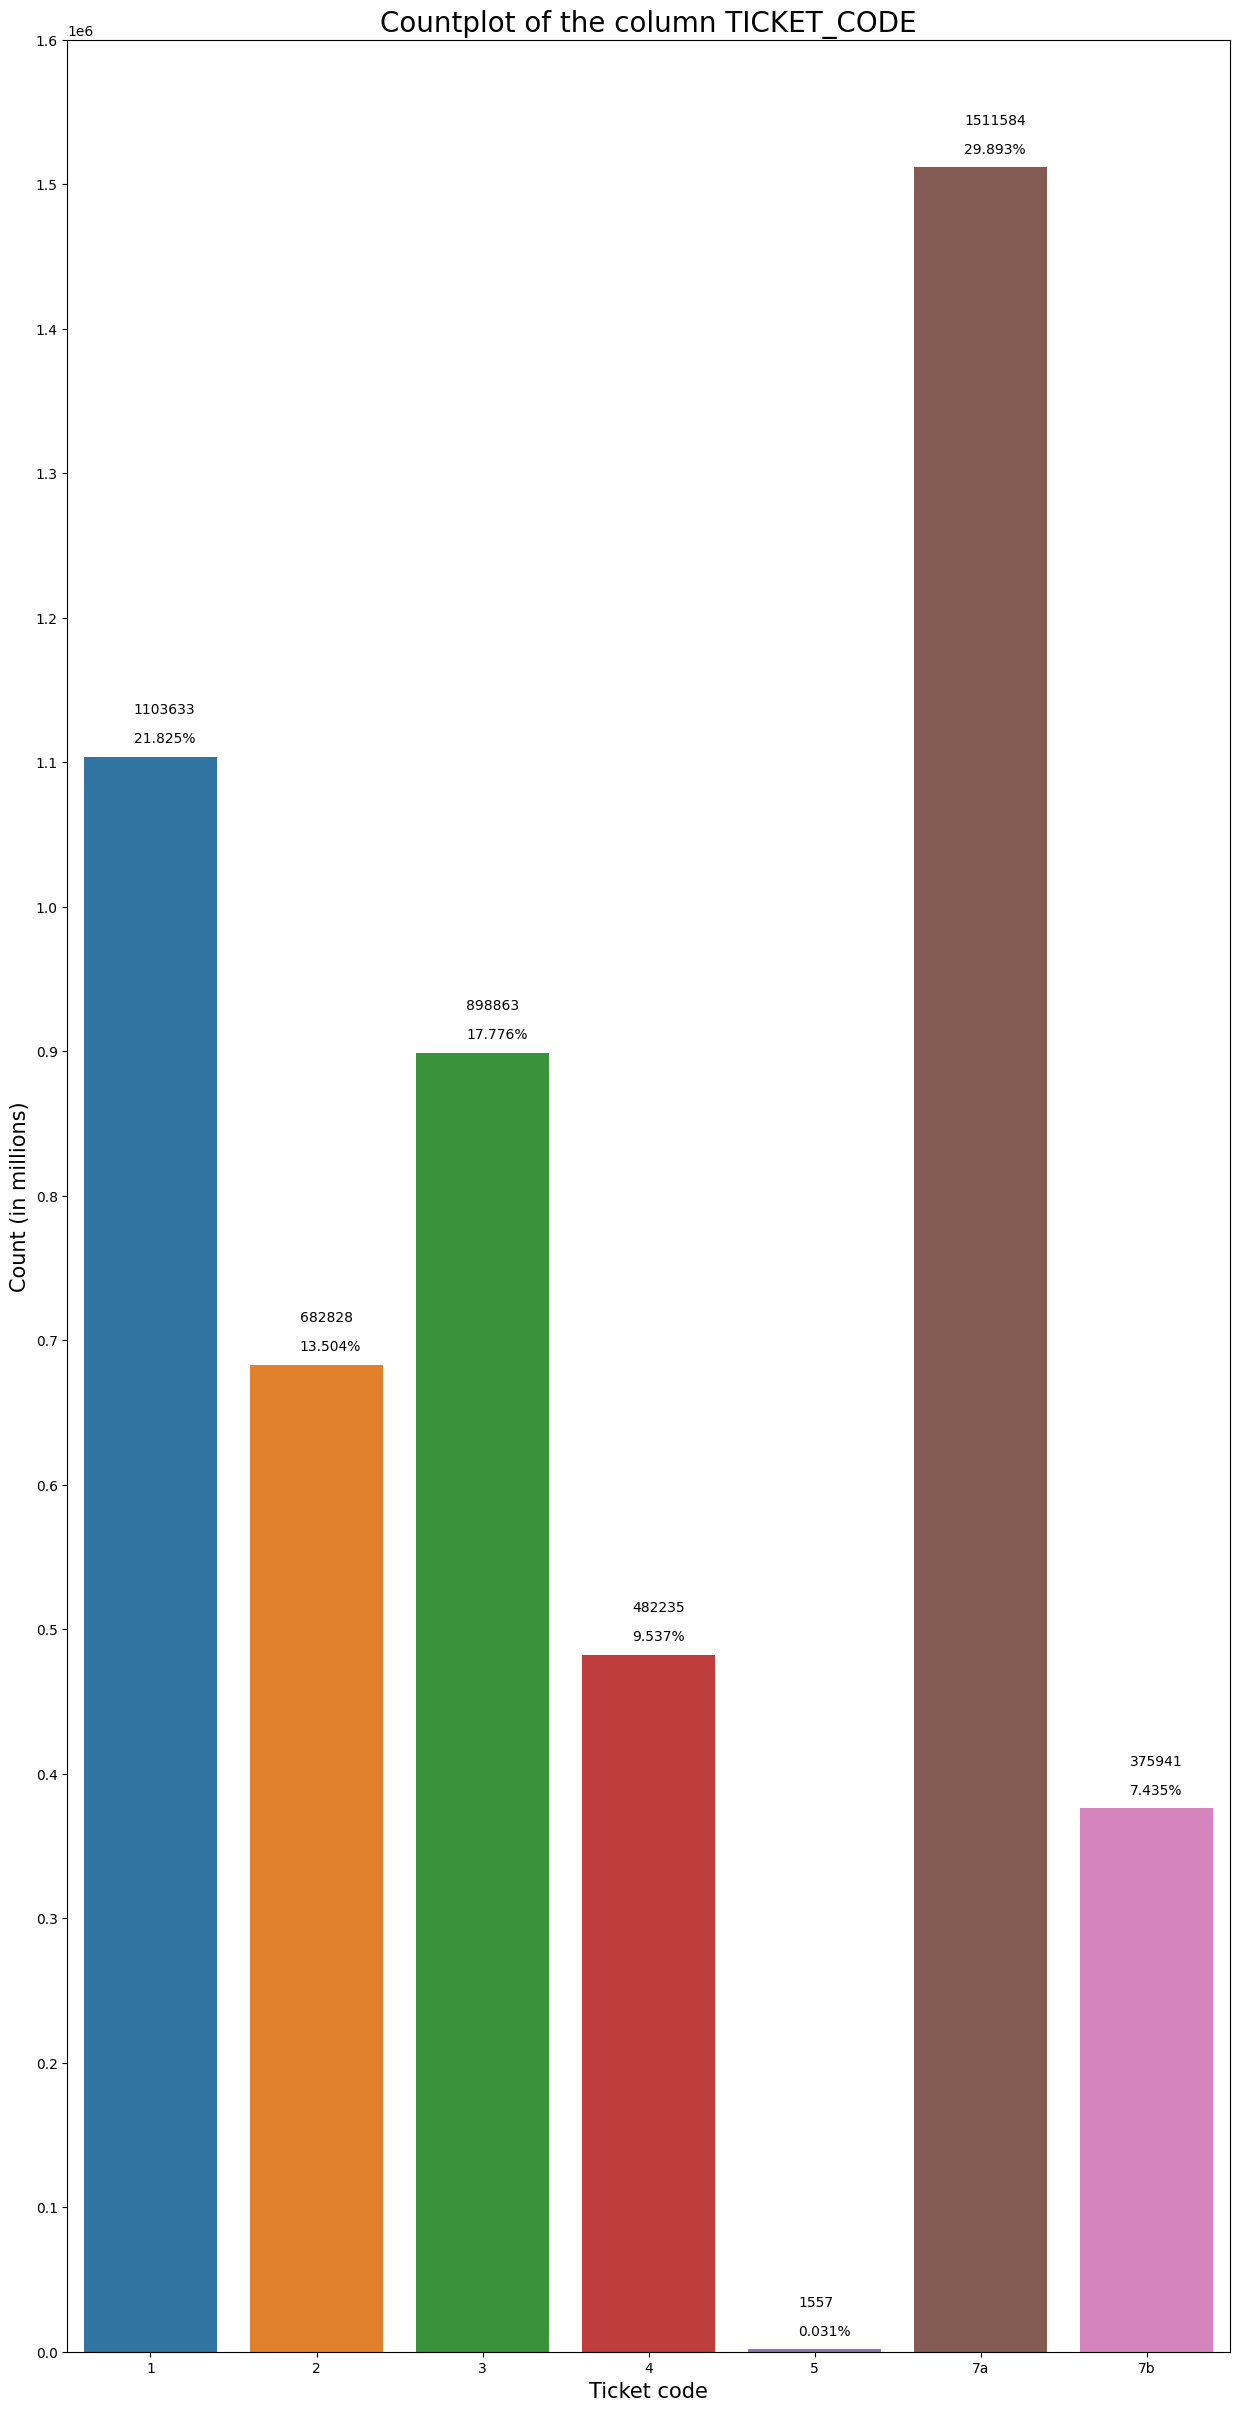

In [130]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

plt.show()

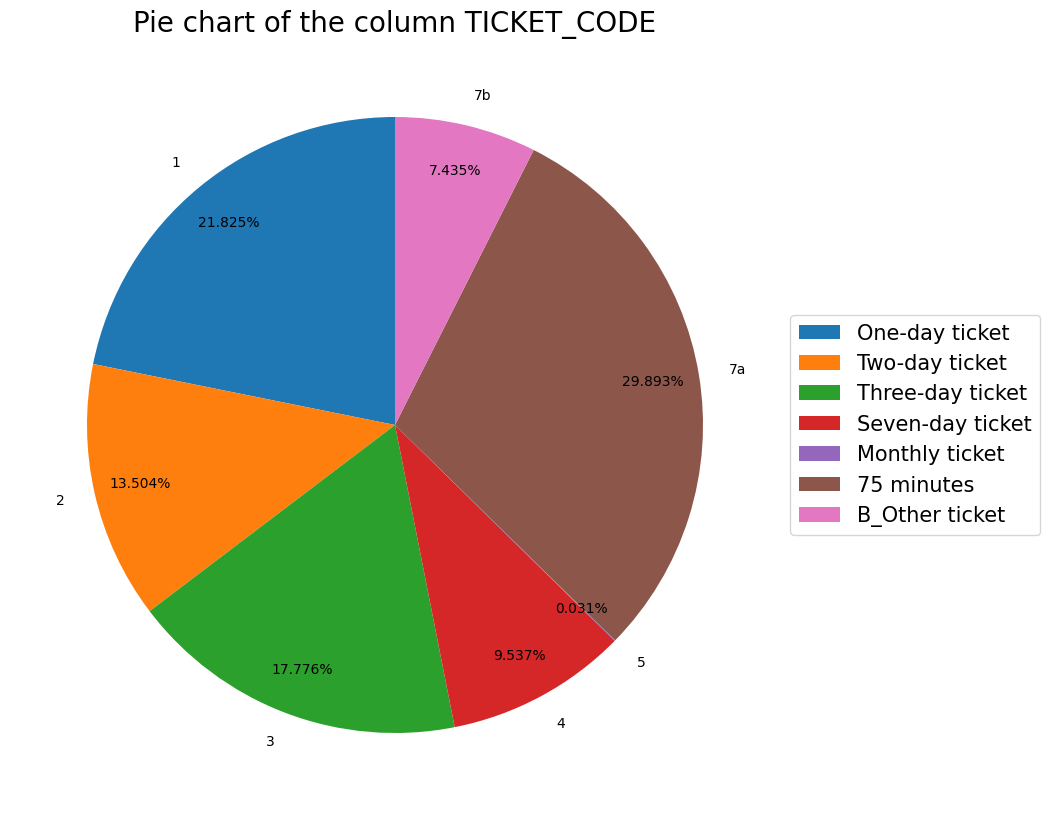

In [131]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(autopct='%1.3f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Focus on Montly tickets

In [132]:
# Find the 'FERMATA' and 'DESCRIZIONE' distributions of the monthly tickets
df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index()

print('The number of different stops (FERMATA) where the monthly tickets are used is: {}'.format(len(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index())))
print('The stops (FERMATA) where the monthly tickets are used are: {}'.format(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index().index))
print('The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: {}'.format(df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index))

The number of different stops (FERMATA) where the monthly tickets are used is: 4
The stops (FERMATA) where the monthly tickets are used are: Int64Index([5022, 5031, 5039, 7777], dtype='int64')
The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: Index(['Giudecca Pal', 'P.le Roma "G', 'PEOPLE MOVER', 'Rialto'], dtype='object')


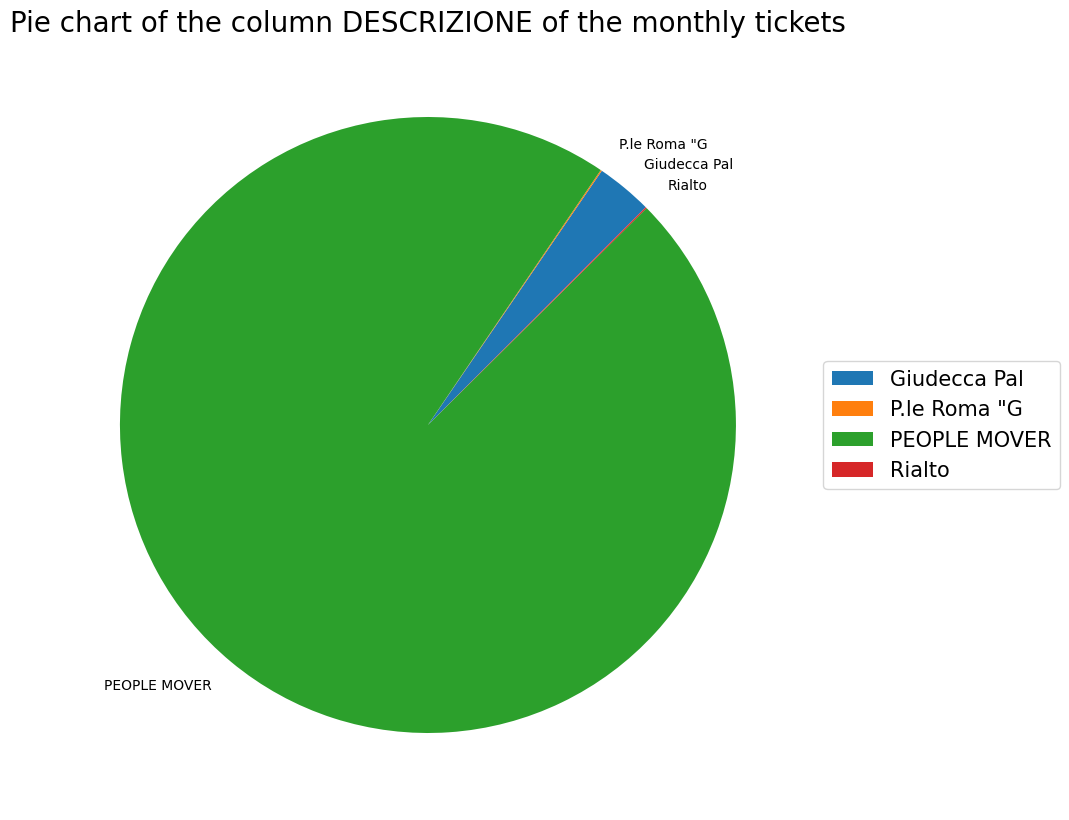

In [133]:
# Plot a pie chart of the column 'DESCRIZIONE' of the monthly tickets
fig, ax = plt.subplots(figsize=(20,10))
df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().plot.pie(startangle=45)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column DESCRIZIONE of the monthly tickets', fontsize=20)
plt.ylabel('')

fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 7b (other tickets) 

In [134]:
shape_before = df.shape[0]

# Delete 7b tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '7b']

# Print the number of rows before and after the deletion of the 7b tickets and the difference
print('The number of rows before the deletion of the 7b tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 7b tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

The number of rows before the deletion of the 7b tickets is: 5056641
The number of rows after the deletion of the 7b tickets is: 4680700
The difference is: 375941


## Data Cleaning

### Useless stamps

In [135]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata

In [136]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
    print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 4 is: 36142613562646276
The serial with the hightest number of validations for the ticket profile 2 is: 41675643963691780
The serial with the hightest number of validations for the ticket profile 3 is: 40549743932450308
The serial with the hightest number of validations for the ticket profile 1 is: 40831218909282052
The serial with the hightest number of validations for the ticket profile 7a is: 36405993298989316
The serial with the hightest number of validations for the ticket profile 5 is: 36144856468188676


In [ ]:
# Sort the df by the date (column 'DATA') and the hour (column 'ORA')
df = df.sort_values(by=['DATA', 'ORA'])

# Print the first 5 rows of the df
df.head()

# Group by the serial and the fermata 
df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by=['DATA', 'ORA']))

# Print the first 5 rows of the df
df.head()

In [ ]:
# Operation with DATA_VALIDAZIONE
# calculate the gap between the validations of the same serial
# df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'])
# df['DATA_VALIDAZIONE'] = df['DATA_VALIDAZIONE'].dt.strftime('%d/%m/%Y %H:%M')

# Sort the dataframe by the column 'SERIALE' and 'DATA_VALIDAZIONE'
# df = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])

# Calculate the gap between the validations of the same serial
# df['GAP'] = df.groupby('SERIALE')['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60


In [ ]:
# print the head of the dataframe to see the new column 'GAP'
# df.head()

In [ ]:
# Given the serial with the hightest number of validations, find the time gap between the validations
# df[df['SERIALE'] == dict_serial['1']]

# For the validation in the same day, find the time gap between the validations
#df[df['SERIALE'] == dict_serial['1']]['DATA_VALIDAZIONE']

In [ ]:
# Print the shape of the dataframe
# print('The shape of the dataframe is: {}'.format(df.shape))

In [ ]:
# The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m/%Y %H:%M'
# If there are more than one validation for the same user (SERIALE) in 2 minutes, then the validation is considered as a mistake so keep only the last validation for each user in 2 minutes

# Sort the dataframe by the column 'SERIALE' and the column 'DATA_VALIDAZIONE'
# df_sort = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])

# Print the head of the dataframe to see the new order of the rows
# df_sort.head(20)

In [ ]:
# Create a new column 'DATA_VALIDAZIONE_2' that is the column 'DATA_VALIDAZIONE' shifted by 1 row
# df_sort['DATA_VALIDAZIONE_2'] = df_sort['DATA_VALIDAZIONE'].shift(1)

# Print the head of the dataframe to see the new column 'DATA_VALIDAZIONE_2'
# df_sort.head(20)

In [ ]:
# Create a new column 'SERIALE_2' that is the column 'SERIALE' shifted by 1 row
# df_sort['SERIALE_2'] = df_sort['SERIALE'].shift(1)

# Print the head of the dataframe to see the new column 'SERIALE_2'
# df_sort.head(20)

In [ ]:
# fill the NaN values with 0
# df_sort['SERIALE_2'] = df_sort['SERIALE_2'].fillna(0)
# df_sort['DATA_VALIDAZIONE_2'] = df_sort['DATA_VALIDAZIONE_2'].fillna(0)

In [ ]:
# Create a new column 'DIFF' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2'
# df_sort['DIFF'] = pd.to_datetime(df_sort['DATA_VALIDAZIONE']) - pd.to_datetime(df_sort['DATA_VALIDAZIONE_2'])

# Print the head of the dataframe to see the new column 'DIFF'
# df_sort.head(20)

In [ ]:
# Create a new column 'DIFF_MINUTES' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' in minutes
# df['DIFF_MINUTES'] = df['DIFF'].dt.total_seconds()/60

# Print the head of the dataframe to see the new column 'DIFF_MINUTES'
# df.head()

In [ ]:
# If the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' is less than 2 minutes and the column 'SERIALE' is equal to the column 'SERIALE_2', then the validation is considered as a mistake
# So keep only the last validation for each user in 2 minutes
# df_to_drop = df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])]
# df = df.drop(df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])].index)

### Stops similar

In [ ]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

In [ ]:
# Define a function that returns the common prefix of a list of strings
def get_common_prefix(string_list):
    # input di tipo  string_list = ["Mestre Centro", "Mirano Centro"]
    first_prefix = string_list[0].split(" ")[0]
    # create and empty dictionary
    prefix_dict = {}

    for string in string_list[1:]:
        if not string.startswith(first_prefix):
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict
    

In [ ]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [ ]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

#### Update some keys in the dictionary

In [ ]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [ ]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

##### S.Erasmo

In [ ]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

##### San Marco

In [ ]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

##### San Dona'

In [ ]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

#### San Pietro

In [ ]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

#### Ca' Rossa

In [ ]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

##### Manage the remaining values in the keys 'S.' and 'San' and others

In [ ]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
for value in dict_prefix['S.']:
    dict_prefix[value] = [value]

for value in dict_prefix['SAN']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANTA']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANT\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['CA\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZA']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZALE']:
    dict_prefix[value] = [value]

for value in dict_prefix['VIA']:
    dict_prefix[value] = [value]

for value in dict_prefix['STAZIONE']:
    dict_prefix[value] = [value]

for value in dict_prefix['TREVISO']:
    dict_prefix[value] = [value]

for value in dict_prefix['TRENTO']:
    dict_prefix[value] = [value]

for value in dict_prefix['INCR.']:
    dict_prefix[value] = [value]

for value in dict_prefix['DE']:
    dict_prefix[value] = [value]



# Remove the keys 'S.' and 'San' witout printing the values
dict_prefix.pop('S.')
dict_prefix.pop('SAN')
dict_prefix.pop('SANTA')
dict_prefix.pop('SANT\'')
dict_prefix.pop('CA\'')
dict_prefix.pop('PIAZZA')
dict_prefix.pop('PIAZZALE')
dict_prefix.pop('VIA')
dict_prefix.pop('STAZIONE')
dict_prefix.pop('TREVISO')
dict_prefix.pop('TRENTO')
dict_prefix.pop('INCR.')
dict_prefix.pop('DE')

#### Treviso and Trento

In [ ]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

#### Keys with only an item

In [ ]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [ ]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

In [ ]:
# Export the dictionary in a json file
import json
with open('dict_prefix.json', 'w') as fp:
    json.dump(dict_prefix, fp)

In [ ]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
df_new.to_csv('data/processed/dataset_cleaned.txt', sep='\t', index=False)

print('The script has finished')